<a href="https://colab.research.google.com/github/Azizbek0712/advertisement/blob/main/ML_regression_example_of_Tashkent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UZbekistn ,Tashkent province, Chilonzor region


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy


In [3]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

In [4]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [5]:
X = housing['size'].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.])

In [6]:
y = housing['price'].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])


**Let's check if there is a linear relationship between price and house area.**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

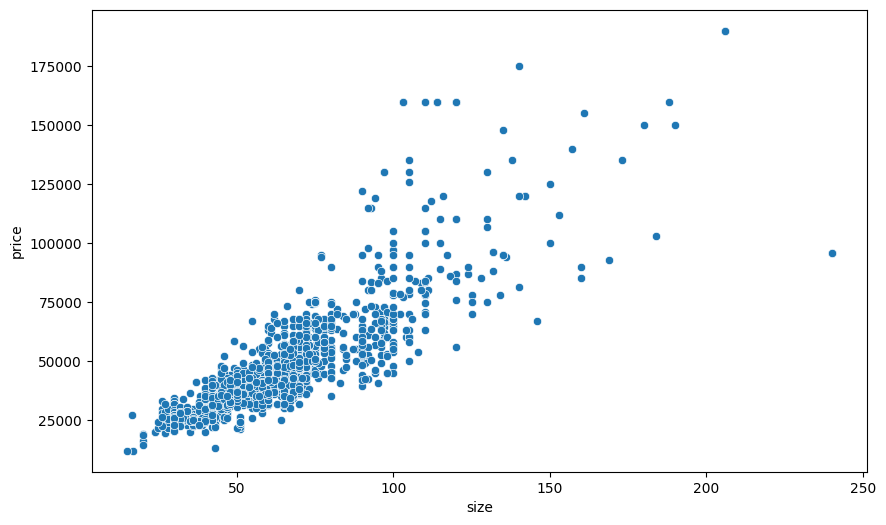

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

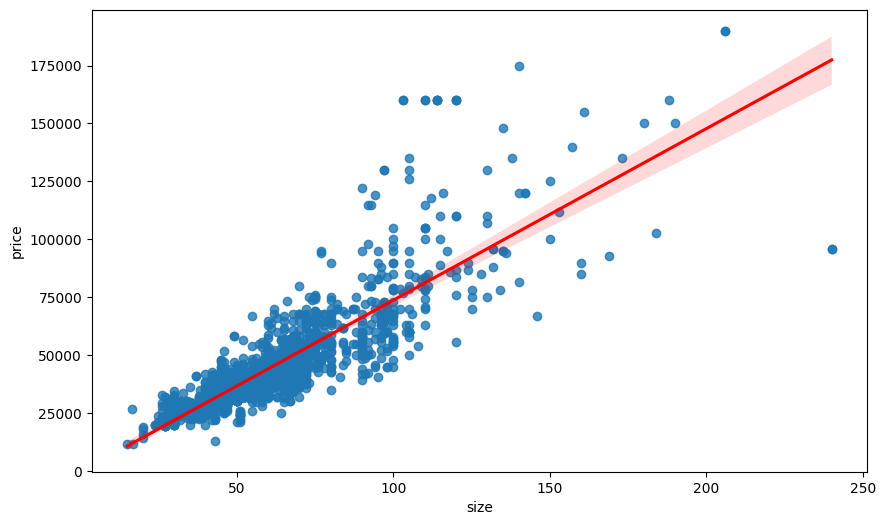

In [9]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

Task 1
Your task is to calculate the coefficients $\theta_0$ and $\theta_1$ using the following formula from the above variables `X` and `y`.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Here $\tilde{x}$ is the average value for column `X`, $\tilde{y}$ is the average value for column `y`

In [13]:
import numpy as np
Xmean =np.mean(X)
Ymean=np.mean(y)

In [14]:
theta1 = sum((X-Xmean)*(y-Ymean))/sum((X-Xmean)**2)
print(f"{theta1=}")

theta1=740.0264822713287


In [16]:
theta0 = Ymean - theta1*Xmean
print(f"{theta0=}")

theta0=-195.94911352690542


Task 2
Extract several random values from x and calculate the corresponding y using the above coefficients.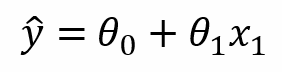

In [17]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")

x_test=array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [18]:
y_predict = theta0 + theta1*x_test
print(f"{y_predict=}")

y_predict=array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


## Task 3

Calculate RMSE (root mean square error), MAE (mean absolute error) between calculated and original values.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [19]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

MAE=4140.35031634715


In [20]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=5882.051673173715


# LR using scikit-learn
Now let's do the above steps using scikit-learn.

First of all, we divide the data into train and test.g)

In [21]:
housing.shape

(1616, 6)

We have little data, so we take 10% for testing

In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

Linear Regression ML

In [23]:

from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=732.7784051414766
theta0=106.31843170110369


We draw a straight line using the values $\theta_0$ and $\theta_1$

Text(0, 0.5, 'Price')

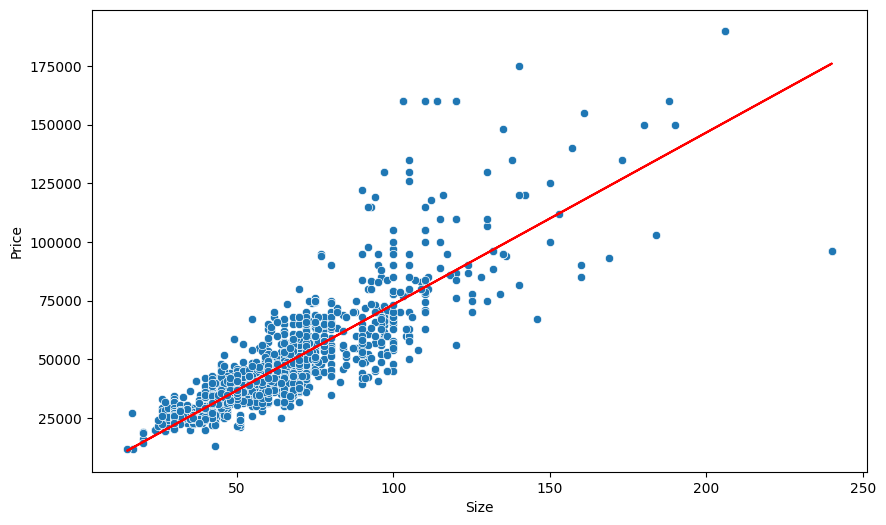

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

### Let's evaluate the model

In [26]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [27]:
y_predict = LR_model.predict(x_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7269.709648262382
RMSE=12734.803748258666
